In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.bath = df.bath.fillna(df.bath.mean())
df.balcony = df.balcony.fillna(df.balcony.mean())
df.society = df.society.fillna("No data")

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,No data,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,No data,1200,2.0,1.0,51.00


In [8]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [9]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,No data,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,No data,1200,2.0,1.0,51.00


In [10]:
df.location = df.location.fillna("Sarjapur  Road")

In [11]:
df.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [12]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [13]:
df2 = df[['location','size','total_sqft','bath','price']]

In [14]:
df2.isnull().sum()

location       0
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [15]:
df2 = df2.dropna()

In [16]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [18]:
df2['size'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [19]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [20]:
df2['bhk'] = df2['size']

In [21]:
col1 = df2.pop('bhk')

df2.insert(1,'bhk', col1)



In [22]:
df2.drop(columns= 'size',inplace= True)

In [23]:
df2.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [24]:

df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
# using a function

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df2[~df2['total_sqft'].apply(is_float)].head(20)

,location,bhk,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.00000,186.000
56,Devanahalli,4,3010 - 3410,2.69261,192.000
81,Hennur Road,4,2957 - 3450,2.69261,224.500
122,Hebbal,4,3067 - 8156,4.00000,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.00000,54.005
165,Sarjapur,2,1145 - 1340,2.00000,43.490
188,KR Puram,2,1015 - 1540,2.00000,56.800
224,Devanahalli,3,1520 - 1740,2.69261,74.820
410,Kengeri,1,34.46Sq. Meter,1.00000,18.500
549,Hennur Road,2,1195 - 1440,2.00000,63.770


In [27]:
#advance data cleaning
def sqft_dash_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
df2['total_sqft'] = df2['total_sqft'].apply(sqft_dash_to_num)

In [29]:
df2.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [30]:
df2.dropna(inplace= True)

In [31]:
df2.shape

(13258, 5)

In [38]:
df2.isnull().sum()

location      0
bhk           0
total_sqft    0
bath          0
price         0
dtype: int64

In [39]:
df_final = df2

In [40]:
df_final.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [41]:
df_final['price_per_sqft'] = df_final['price']*100000/df_final['total_sqft']

In [42]:
df_final.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [43]:
df_final.shape

(13258, 6)

In [44]:
df2['location'] = df2['location'].apply(lambda x: x.strip())

In [45]:
loc_stats = df_final.location.value_counts()

In [46]:
loc_stats[loc_stats<=10].count()

1047

In [47]:
loclessthan_10 = loc_stats[loc_stats<=10]

In [48]:
loclessthan_10.head()

Naganathapura          10
Nagadevanahalli        10
Sadashiva Nagar        10
Kalkere                10
Sector 1 HSR Layout    10
Name: location, dtype: int64

In [49]:
# adding all less than 10 loc into : OTHER

df_final.location = df_final.location.apply(lambda x: 'other' if x in loclessthan_10 else x)

In [50]:
df_final.location.nunique()

241

In [51]:
df_final.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


## Outliers removal by the knowledge of bussiness domain

As is know that 1bhk house must be more than 300 sqft

In [52]:
df_final = df_final[~(df_final.total_sqft/df_final.bhk < 300)]

In [53]:
df_final.shape

(12514, 6)

In [54]:
df_final.price_per_sqft.describe()

count     12514.000000
mean       6307.367132
std        4160.773691
min         267.829813
25%        4210.762120
50%        5295.073227
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
## removing outliers and making data frame distributed normally

def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        red_df = subdf[(subdf.price_per_sqft>(m-st)) &(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,red_df],ignore_index = True)
    return df_out



In [126]:
df_final1 = remove_outliers(df_final)
df_final1.shape

(10289, 6)

In [127]:
df_final1.price_per_sqft.describe()

count    10289.000000
mean      5660.804560
std       2266.753972
min       1250.000000
25%       4250.000000
50%       5176.470588
75%       6428.571429
max      24509.803922
Name: price_per_sqft, dtype: float64

In [61]:
df2.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


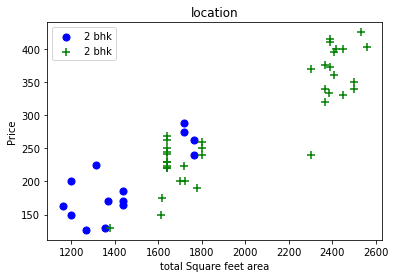

In [62]:
## Viz where it is happening that 2bhk price > 3bhk

def plot_scatter(df2,location):
    bhk2 = df2[(df2.location == location) &(df2.bhk ==2)]
    bhk3 = df2[(df2.location == location) &(df2.bhk ==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label ='2 bhk' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label ='2 bhk' ,s=50)
    plt.xlabel('total Square feet area')
    plt.ylabel('Price')
    plt.title('location')
    plt.legend()

plot_scatter(df_final1,'Rajaji Nagar')



### plotly tried
bhk2 = df2[(df2.location == 'Rajaji Nagar') &(df2.bhk ==2)]
bhk3 = df2[(df2.location == 'Rajaji Nagar') &(df2.bhk ==3)]
fig = px.scatter(bhk2, x='total_sqft',y = 'price')
px.scatter(bhk3, x='total_sqft',y = 'price')
fig.show()

In [128]:
#plt.hist(df_final1.price_per_sqft ,rwidth=0.7)
#plt.xlabel('Price per Square feet area')
#plt.ylabel('Count')
#plt.gcf().set_size_inches((15,10))
#plt.show()

fig = px.histogram(df_final1, x='price_per_sqft')
fig.update_layout(barmode='group', bargap = 0.5)
fig.show()

In [129]:
# new feature inspection = Bathrooms (i went to my bussines manager)

df_final1.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

In [130]:
# droping the count of bathrooms who were in float numbers
df_final1.drop(df_final1[(df_final1.bath >2.5) & (df_final1.bath <2.7)].index, inplace = True)

In [131]:

df_final1.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [140]:
#plt.hist(df_final1.bath, rwidth=0.8)
#plt.show
fig = px.histogram(df_final1, x='bath')
fig.update_layout(barmode='group', bargap=0.30,bargroupgap=0.0)
fig.show()

In [137]:
#as we saw there are some houses have more than 5 bathrooms may be outlires?
''' yes there was some so i removed them '''
df_final1.drop(df_final1[df_final1.bath > df_final1.bhk+2].index, inplace = True)

In [138]:
df_final1.shape

(10234, 6)

In [150]:
df_final1[df_final1.bath > 15]

#its fine now begin with ML

,location,bhk,total_sqft,bath,price,price_per_sqft
8617,other,16,10000.0,16.0,550.0,5500.0


In [155]:
df_final1.to_csv('Final_cleaned_data.csv')

## AS WE CLEANED OUR DATA NOW I AM MOVING TOWARDS MODEL TRAINING

In [10]:
#loaded our data without index
dff = pd.read_csv('Final_cleaned_data.csv',index_col= 0)

In [88]:
dff.head(15)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,413.0,15018.181818
6,1st Block Jayanagar,4,2450.0,4.0,368.0,15020.408163
7,1st Phase JP Nagar,4,2825.0,4.0,250.0,8849.557522
8,1st Phase JP Nagar,3,1875.0,3.0,167.0,8906.666667
9,1st Phase JP Nagar,5,1500.0,5.0,85.0,5666.666667


In [12]:
# one hot enchoding
dummies_dff =  pd.get_dummies(dff.location)
dff1 = pd.concat([dff,dummies_dff],axis='columns')

In [17]:
#dummmy variable trap avoided and string categorical data column removed

dff1 = dff1.drop(columns=['Vittasandra','location'])

In [18]:
dff1.head(3)

,bhk,total_sqft,bath,price,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,428.0,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dff1.shape

(10234, 245)

### MOdel training

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

model = LinearRegression()

In [91]:
%%time
x= dff1.drop(columns=['price','price_per_sqft'])
y = dff1['price']

Wall time: 9.24 ms


In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=10)

In [93]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7799051992557404

### Predictions

### As we used hot encoding for th elocation so we need a script to take input as location and get desired predictions

Input Parameters: Bhk;total_sqft;bath;location

In [94]:
x.columns

Index(['bhk', 'total_sqft', 'bath', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=243)

In [95]:
# Script for prediction
def prediction(location,sqft,bhk,bath):
    location_index = np.where(x.columns == location)[0][0]

    X = np.zeros(len(x.columns))
    X[0]=bhk
    X[1]=sqft
    X[2]=bath     
 # 'X[3]= pricepersqft'( if we want to add price_p_sqft as a feature)       
    if location_index>=0:
        X[location_index]=1
    return model.predict([X])[0]


In [101]:
#Give input in order of location,sqft,bhk,bath

Price_prediction = prediction('1st Phase JP Nagar',1400,2,2)

print("The predicted price is",Price_prediction ,"lakh")

The predicted price is 117.0444360130797 lakh


### Now i am Going to check other Reg models and find out which one is the best

## Model Deployment

### Saving my model for further use as pickle file
     This will save my model training time 

In [103]:
import pickle

In [104]:
with open('house_prediction_model', 'wb') as f:
    pickle.dump(model,f)

How to open dumped pickle file :
with open('house_prediction_model', 'rb') as f:
    model1 = pickle.load(f)